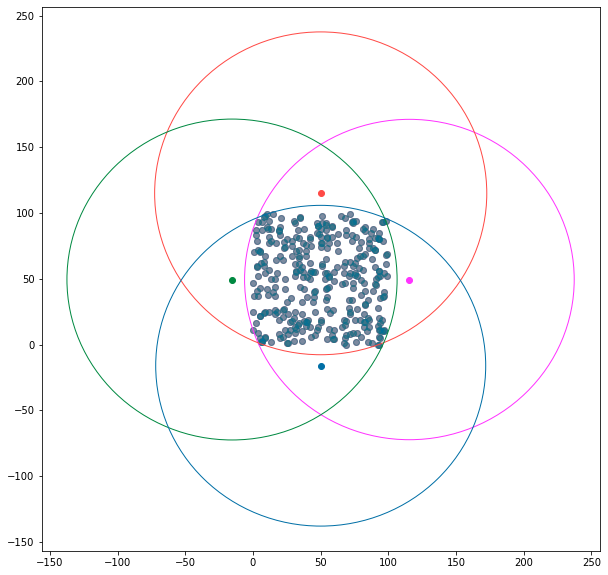

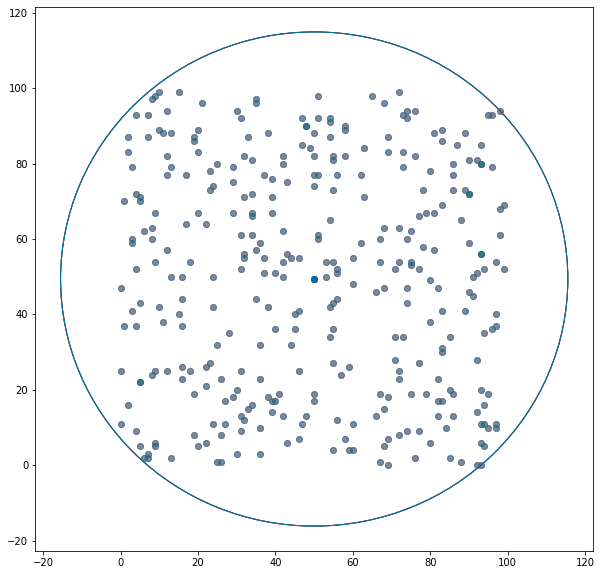

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Cluster:
    def __init__(self, center, points=[]):
        self.center = center
        self.points = points

    def generate_new_center(self):
        if len(self.points) <= 0:
            pass
        x, y = 0, 0
        for point in self.points:
            x += point.x
            y += point.y
        self.center = Point(x / len(self.points), y / len(self.points))


n = 340
k = 4

colors = [
    "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",


]


def distance(a, b):
    return np.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)


def random_points(num):
    temp = []
    for i in range(num):
        temp.append(Point(np.random.randint(0, 100), np.random.randint(0, 100)))

    return temp


def find_centers(points, k):
    temp = []
    x_s, y_s = 0, 0
    for point in points:
        x_s += point.x
        y_s += point.y
    x_s /= len(points)
    y_s /= len(points)
    center = Point(x_s, y_s)
    max_dist = 0
    for point in points:
        max_dist = max(max_dist, distance(point, center))

    for i in range(k):
        x_f = x_s + max_dist * math.cos(2 * i * np.pi / k)
        y_f = y_s + max_dist * math.sin(2 * i * np.pi / k)
        temp.append(Point(x_f, y_f))

    return temp


def draw(clusters: list):
    plt.figure(figsize=(10, 10))
    for i, cluster in enumerate(clusters):
        px, py = [], []
        radius = 0
        for point in cluster.points:
            px.append(point.x)
            py.append(point.y)
            if distance(point, cluster.center) > radius:
                radius = distance(point, cluster.center)
        plt.scatter(px, py, c=colors[i], alpha=0.3)
        plt.scatter(cluster.center.x, cluster.center.y, c=colors[i])
        plt.gca().add_patch(plt.Circle((cluster.center.x, cluster.center.y), radius, color=colors[i], fill=False))
    plt.show()


def k_means(points, centers):
    clusters = []
    for center in centers:
        clusters.append(Cluster(center))
    for point in points:
        cluster_temp = clusters[0]
        for cluster in clusters:
            if distance(point, cluster.center) < distance(point, cluster_temp.center):
                cluster_temp = cluster
        cluster_temp.points.append(point)

    draw(clusters)
    flag = True
    while flag:
        flag = False
        for cluster in clusters:
            cluster.generate_new_center()
        for cluster in clusters:
            for point in cluster.points:
                cluster_temp = cluster
                for cluster_other in clusters:
                    if distance(point, cluster_other.center) < distance(point, cluster_temp.center):
                        cluster_temp = cluster_other
                if cluster_temp != cluster:
                    cluster.points.remove(point)
                    cluster_temp.points.append(point)
                    flag = True
        draw(clusters)


test_points = random_points(n)
clusters_t = find_centers(test_points, k)
k_means(test_points, clusters_t)